In [16]:
from   faraway.datasets import teengamb
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

### 1

In [2]:
tg = teengamb.load()
tg.head()

,sex,status,income,verbal,gamble
0,1,51,2.0,8,0.0
1,1,28,2.5,8,0.0
2,1,37,2.0,6,0.0
3,1,28,7.0,4,7.3
4,1,65,2.0,8,19.6


In [5]:
lmod = smf.ols('gamble ~ sex + status + income + verbal', data=tg).fit()
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 gamble   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     11.69
Date:                Sat, 26 Feb 2022   Prob (F-statistic):           1.81e-06
Time:                        17:24:25   Log-Likelihood:                -210.78
No. Observations:                  47   AIC:                             431.6
Df Residuals:                      42   BIC:                             440.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.5557     17.197      1.312      0.197     -12.149      57.260
sex          -22.1183      8.211     -2.694      0.010     -38.689      -5.548
status         0.0522      0.281      0.186      0.853      -0.515       0.620
income         4.9620      1.025      4.839      0.000       2.893       7.031
verbal        -2.9595      2.172     -1.362      0.180      -7.343       1.424
==============================================================================
Omnibus:                       31.143   Durbin-Watson:                   2.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.046
Skew:                           1.604   Prob(JB):                     1.14e-22
Kurtosis:                       9.427   Cond. No.                         264.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
lmod.resid.idxmax()

23

In [9]:
lmod.resid.mean(), lmod.resid.median()

(6.743352920974312e-13, -1.4513920689688593)

In [15]:
lmod.fittedvalues.corr(lmod.resid)

1.1390689371420674e-15

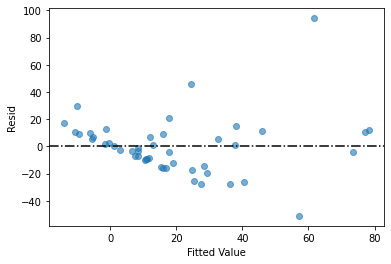

In [27]:
plt.scatter(lmod.fittedvalues, lmod.resid, alpha=0.6)
plt.xlabel('Fitted Value')
plt.ylabel('Resid')
plt.axhline(y=0, color='k', linestyle='-.');